In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
brent = pd.read_excel(r'C:\Users\Sandhyana\Desktop\brentprice.xls', sheet_name='Data 1',index_col='Date')
wti = pd.read_excel(r'C:\Users\Sandhyana\Desktop\wtiprice.xls', sheet_name='Data 1',index_col='Date')

In [3]:
brent1 = brent.resample('D').ffill().reset_index()
wti1 = wti.resample('D').ffill().reset_index()

In [4]:
prices=[brent1['Date'],brent1['bp'],wti1['wp']]
price=pd.concat(prices, axis=1)
price

,Date,bp,wp
0,1987-05-20,18.63,19.75
1,1987-05-21,18.45,19.95
2,1987-05-22,18.55,19.68
3,1987-05-23,18.55,19.68
4,1987-05-24,18.55,19.68
...,...,...,...
12118,2020-07-23,42.96,40.99
12119,2020-07-24,43.29,41.23
12120,2020-07-25,43.29,41.23
12121,2020-07-26,43.29,41.23


In [5]:
price['df']=price['bp']-price['wp']
price

,Date,bp,wp,df
0,1987-05-20,18.63,19.75,-1.12
1,1987-05-21,18.45,19.95,-1.50
2,1987-05-22,18.55,19.68,-1.13
3,1987-05-23,18.55,19.68,-1.13
4,1987-05-24,18.55,19.68,-1.13
...,...,...,...,...
12118,2020-07-23,42.96,40.99,1.97
12119,2020-07-24,43.29,41.23,2.06
12120,2020-07-25,43.29,41.23,2.06
12121,2020-07-26,43.29,41.23,2.06


In [6]:
price['Date'] = pd.to_datetime(price['Date'])


In [7]:
price.set_index('Date', inplace=True)
price

,bp,wp,df
Date,,,
1987-05-20,18.63,19.75,-1.12
1987-05-21,18.45,19.95,-1.50
1987-05-22,18.55,19.68,-1.13
1987-05-23,18.55,19.68,-1.13
1987-05-24,18.55,19.68,-1.13
...,...,...,...
2020-07-23,42.96,40.99,1.97
2020-07-24,43.29,41.23,2.06
2020-07-25,43.29,41.23,2.06


# cointegration - 2000 -2019

In [21]:
price = price[(price['Date' ] > '1999-12-31') & (price['Date' ] <= '2019-12-31')]
price

,Date,bp,wp,df
4609,2000-01-01,24.93,25.76,-0.83
4610,2000-01-02,24.93,25.76,-0.83
4611,2000-01-03,24.93,25.76,-0.83
4612,2000-01-04,23.95,25.56,-1.61
4613,2000-01-05,23.72,24.65,-0.93
...,...,...,...,...
11909,2019-12-27,68.91,61.76,7.15
11910,2019-12-28,68.91,61.76,7.15
11911,2019-12-29,68.91,61.76,7.15
11912,2019-12-30,68.30,61.66,6.64


In [22]:
price1=price.copy()
price1

,Date,bp,wp,df
4609,2000-01-01,24.93,25.76,-0.83
4610,2000-01-02,24.93,25.76,-0.83
4611,2000-01-03,24.93,25.76,-0.83
4612,2000-01-04,23.95,25.56,-1.61
4613,2000-01-05,23.72,24.65,-0.93
...,...,...,...,...
11909,2019-12-27,68.91,61.76,7.15
11910,2019-12-28,68.91,61.76,7.15
11911,2019-12-29,68.91,61.76,7.15
11912,2019-12-30,68.30,61.66,6.64


In [23]:
price1['Date'] = pd.to_datetime(price1['Date'])
price1.set_index('Date', inplace=True)

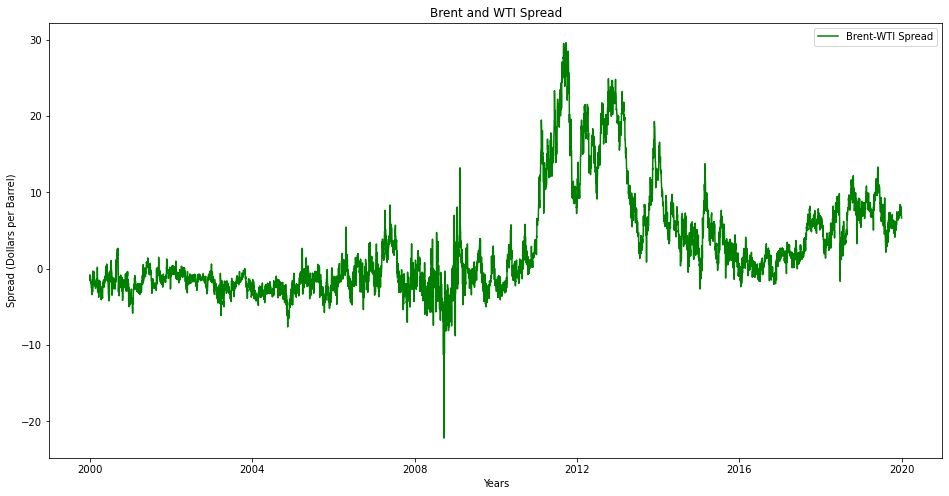

In [31]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax=plt.subplots(figsize=(16,8))
plt.plot(price1['df'],'g', label='Brent-WTI Spread')
legend=ax.legend(loc='upper right')
plt.title('Brent and WTI Spread')
plt.xlabel('Years')
plt.ylabel('Spread (Dollars per Barrel)')
plt.show()

In [ ]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
joh_model1 = coint_johansen(price1,-1,2) # k_ar_diff +1 = K
joh_output(joh_model1)

# cointegration - 2000 - 2010

In [9]:
price2 = price[(price['Date' ] > '1999-12-31') & (price['Date' ] <= '2009-12-31')]
price2

KeyError: 'Date'

In [ ]:
price2=price2.copy()

In [ ]:
price2['Date'] = pd.to_datetime(price2['Date'])
price2.set_index('Date', inplace=True)

In [ ]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

from statsmodels.tsa.vector_ar.vecm import coint_johansen
joh_model2 = coint_johansen(price2,-1,2) # k_ar_diff +1 = K
joh_output(joh_model2)

# cointegration - 2011 - 2019

In [ ]:
price3 = price[(price['Date' ] > '2010-12-31') & (price['Date' ] <= '2019-12-31')]
price3

In [ ]:
price3=price3.copy()

In [ ]:
price3['Date'] = pd.to_datetime(price3['Date'])
price3.set_index('Date', inplace=True)

In [ ]:
def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

from statsmodels.tsa.vector_ar.vecm import coint_johansen
joh_model3 = coint_johansen(price3,-1,2) # k_ar_diff +1 = K
joh_output(joh_model3)

# ADF tests

In [ ]:
# BRENT: 2000 -2019 
from statsmodels.tsa.stattools import adfuller
from numpy import log
adf1 = adfuller(price['bp'])
print('ADF Statistic: %f' % adf1[0])
print('p-value: %f' % adf1[1])

In [ ]:
#WTI: 2000 -2019
adf2 = adfuller(price['wp'])
print('ADF Statistic: %f' % adf2[0])
print('p-value: %f' % adf2[1])

In [ ]:
#SPREAD
price['Spread']=price['wp']-price['bp']
price

In [ ]:
#SPREAD: 2000-2019
adf3 = adfuller(price['Spread'])
print('ADF Statistic: %f' % adf3[0])
print('p-value: %f' % adf3[1])

In [ ]:
#First Difference 
price['bp1']=price['bp'].diff(periods=1).dropna()
price['wp1']=price['wp'].diff(periods=1).dropna()
price

In [ ]:
price=price.dropna()

In [ ]:
fig,ax=plt.subplots(figsize=(8,6)) 
plt.plot(price['bp1'],'g',label='brent') 
plt.plot(price['wp1'],'b',label='wti')
plt.legend(loc='upper right', fontsize='larger') 
plt.show()

In [ ]:
#check for stationarity after first difference
#BRENT: 2000-2019

adf_diff1 = adfuller(price['bp1'])
print('ADF Statistic: %f' % adf_diff1[0])
print('p-value: %f' % adf_diff1[1])

In [ ]:
#WTI: 2000-2019
adf_diff2 = adfuller(price['wp1'])
print('ADF Statistic: %f' % adf_diff2[0])
print('p-value: %f' % adf_diff2[1])

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
result = adfuller(price['bp1'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

In [ ]:
from statsmodels.tsa.stattools import adfuller 
adf = adfuller(price['Spread'],5)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")


In [ ]:
import statsmodels.tsa.stattools as ts 
cointegration=ts.coint(price1['wp'], price1['bp'])
cointegration

In [36]:
from statsmodels.tsa.stattools import select_coint_rank
rank_test = select_coint_rank(price1, 0, 3, method="trace",
                              signif=0.95)
rank_test.rank

ImportError: cannot import name 'select_coint_rank' from 'statsmodels.tsa.stattools' (C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py)